<a href="https://colab.research.google.com/github/angelafrocha/Loja-de-Vinhos/blob/main/Projeto_Pandas_Angela_e_AdrianoL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalações

In [ ]:
pip install pymongo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install gcsfs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 8.8 MB/s eta 0:00:00


In [ ]:
pip install pandera

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 KB 3.7 MB/s eta 0:00:00


# Importações das Libs

In [ ]:
import pymongo
import pandas as pd
import os
import numpy as np
import pandera as pa
from pymongo import MongoClient
from google.cloud import storage

# Conector GCP

In [ ]:
#CONFIGURANDO DA CHAVE DE SEGURANCA (Enviada com o projeto)
serviceAccount = '/content/fluid-firefly-377819-2bcdc3db620d.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
#Configurações Google Cloud Storage
client = storage.Client()
bucket = client.get_bucket('adriano-lengruber-01')
bucket.blob('marketing_campaign.csv')
path = 'gs://adriano-lengruber-01/brutos/marketing_campaign.csv'

# Conector MongoDB

In [ ]:
uri = "mongodb+srv://solucode.oceubf9.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority"
client = MongoClient(uri,
                     tls=True,
                     tlsCertificateKeyFile='/content/X509-cert-4253424679511986131.pem',
                     )
db = client['mkt']
collection = db['brutos']


In [ ]:
# Contando para verificar quantos docs existem na coleção

doc_count = collection.count_documents({})
print(doc_count)

0


#Extração dos dados BRUTOS

In [ ]:

# Extração dos dados já alterando o tipo da coluna "Dt_Customer" para DateTime
df = pd.read_csv(path,sep=',',parse_dates=['Dt_Customer'],dayfirst=True)


In [ ]:
#Fazendo o backup de segurança
df_bkp = df.copy()

In [ ]:
#Solução para conseguir visualizar todas as colunas do dataframe
pd.set_option('display.max_columns',100)

In [ ]:
df

#Enviando Brutos para MongoDB

In [ ]:
#seleção de base e coleçao
db = client['mkt']
colecaob = db['brutos']

In [ ]:
#Transformando dados brutos em dicionário e 
#Envio dos dados brutos para o MongoDB
df_bruto = df.to_dict("records")
collection.insert_many(df_bruto)

In [ ]:
# Contando NOVAMENTE para verificar quantos docs existem na coleção e vendo que foi inserido nosso DF
doc_count = collection.count_documents({})
print(doc_count)

2240


#Tratamento dos dados

In [ ]:
# Deixando nome de coluna em minuscula
df.columns = df.columns.str.lower()

In [ ]:
df.dtypes

id                              int64
year_birth                      int64
education                      object
marital_status                 object
income                        float64
kidhome                         int64
teenhome                        int64
dt_customer            datetime64[ns]
recency                         int64
mntwines                        int64
mntfruits                       int64
mntmeatproducts                 int64
mntfishproducts                 int64
mntsweetproducts                int64
mntgoldprods                    int64
numdealspurchases               int64
numwebpurchases                 int64
numcatalogpurchases             int64
numstorepurchases               int64
numwebvisitsmonth               int64
acceptedcmp3                    int64
acceptedcmp4                    int64
acceptedcmp5                    int64
acceptedcmp1                    int64
acceptedcmp2                    int64
complain                        int64
z_costcontac

In [ ]:
 # Traduzindo Colunas

df.rename(columns={'year_birth':'ano_nascimento',
                   'education': 'escolaridade',
                   'marital_status':'estado_civil',
                   'income':'renda_anual',
                   'kidhome':'n_criancas',
                   'teenhome':'n_adolescentes',
                   'dt_customer':'data_cadastro',
                   'recency':'n_dias_ult_compra',
                   'mntwines':'vinicolas',
                   'mntfruits':'frutas',
                   'mntmeatproducts':'carne',
                   'mntfishproducts':'peixe',
                   'mntsweetproducts':'doces',
                   'mntgoldprods':'produtos_ouro',
                   'numdealspurchases':'oferta_compra', 
                   'numwebpurchases':'compras_site',
                   'numcatalogpurchases':'catalogo',
                   'numstorepurchases':'loja_fisica', 
                   'numwebvisitsmonth':'visitas_ult_mes',
                   'acceptedcmp3':'campanha3', 
                   'acceptedcmp4':'campanha4', 
                   'acceptedcmp5':'campanha5', 
                   'acceptedcmp1':'campanha1',
                   'acceptedcmp2':'campanha2', 
                   'complain':'reclamacoes', 
                   'z_costcontact':'custo_contato', 
                   'z_revenue':'receita', 
                   'response':'resposta',}, inplace=True)


In [ ]:
# Verificando lista de dados únicos da coluna "estado_civil". Foi usada uma comninação de unique() com a função sorted
#apenas para aparecer mais organizado(nesse caso o sorted colocou em ordem alfabética)
sorted(df['estado_civil'].unique())

['Absurd',
 'Alone',
 'Divorced',
 'Married',
 'Single',
 'Together',
 'Widow',
 'YOLO']

In [ ]:
# Traduzindo campos dentro de coluna estado civil - necessidade de trocar somente os atributos na busca
df.loc[df.estado_civil == 'Absurd',['estado_civil']] = 'Absurd'
df.loc[df.estado_civil == 'Alone',['estado_civil']] = 'Sozinho'
df.loc[df.estado_civil == 'Divorced',['estado_civil']] = 'Divorciado(a)'
df.loc[df.estado_civil == 'Married',['estado_civil']] = 'Casado(a)'
df.loc[df.estado_civil == 'Single',['estado_civil']] = 'Solteiro(a)'
df.loc[df.estado_civil == 'Together',['estado_civil']] = 'Uniao Estavel'
df.loc[df.estado_civil == 'Widow',['estado_civil']] = 'Viuvo(a)'
df.loc[df.estado_civil == 'YOLO',['estado_civil']] = 'YOLO'

In [ ]:
#Verificando a lista de dados únicos da coluna "escolaridade"
sorted(df['escolaridade'].unique())

['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD']

In [ ]:
# Traduzindo campos dentro de coluna esolaridade - necessidade de trocar somente os atributos na busca
df.loc[df.escolaridade == 'Master',['escolaridade']] = 'Mestrado'
df.loc[df.escolaridade == 'Basic',['escolaridade']] = 'Formacao_Basica'
df.loc[df.escolaridade == 'Graduation',['escolaridade']] = 'Graduacao'
df.loc[df.escolaridade == '2n Cycle',['escolaridade']] = 'Pós-graduação'

In [ ]:
df.dtypes

id                            int64
ano_nascimento                int64
escolaridade                 object
estado_civil                 object
renda_anual                 float64
n_criancas                    int64
n_adolescentes                int64
data_cadastro        datetime64[ns]
n_dias_ult_compra             int64
vinicolas                     int64
frutas                        int64
carne                         int64
peixe                         int64
doces                         int64
produtos_ouro                 int64
oferta_compra                 int64
compras_site                  int64
catalogo                      int64
loja_fisica                   int64
visitas_ult_mes               int64
campanha3                     int64
campanha4                     int64
campanha5                     int64
campanha1                     int64
campanha2                     int64
reclamacoes                   int64
custo_contato                 int64
receita                     

In [ ]:
df.count()

id                   2240
ano_nascimento       2240
escolaridade         2240
estado_civil         2240
renda_anual          2216
n_criancas           2240
n_adolescentes       2240
data_cadastro        2240
n_dias_ult_compra    2240
vinicolas            2240
frutas               2240
carne                2240
peixe                2240
doces                2240
produtos_ouro        2240
oferta_compra        2240
compras_site         2240
catalogo             2240
loja_fisica          2240
visitas_ult_mes      2240
campanha3            2240
campanha4            2240
campanha5            2240
campanha1            2240
campanha2            2240
reclamacoes          2240
custo_contato        2240
receita              2240
resposta             2240
dtype: int64

In [ ]:
#df.counts mostrou que tem dados faltantes na coluna renda anual

#Verificando a qtd de NaN no DF - devemos verificar o motivo deste dado estar faltando 
df.groupby(['renda_anual'],dropna=False).size().sort_values(ascending=False)

renda_anual
NaN        24
7500.0     12
35860.0     4
47025.0     3
48432.0     3
           ..
42160.0     1
42081.0     1
42033.0     1
42021.0     1
51813.0     1
Length: 1975, dtype: int64

In [ ]:
#Lembramos de colocar os dados do DF em letra maíscula apenas no final da análise e encontramos este código na nossa pesquisa 
df.applymap(lambda x: x.upper() if isinstance(x, str) else x)

,id,ano_nascimento,escolaridade,estado_civil,renda_anual,n_criancas,n_adolescentes,data_cadastro,n_dias_ult_compra,vinicolas,...,visitas_ult_mes,campanha3,campanha4,campanha5,campanha1,campanha2,reclamacoes,custo_contato,receita,resposta
0,5524,1957,GRADUACAO,SOLTEIRO(A),58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,GRADUACAO,SOLTEIRO(A),46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,GRADUACAO,UNIAO ESTAVEL,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,GRADUACAO,UNIAO ESTAVEL,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PHD,CASADO(A),58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,GRADUACAO,CASADO(A),61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PHD,UNIAO ESTAVEL,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,GRADUACAO,DIVORCIADO(A),56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,MESTRADO,UNIAO ESTAVEL,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


##Explorando colunas

In [ ]:
df.head(5)

,id,ano_nascimento,escolaridade,estado_civil,renda_anual,n_criancas,n_adolescentes,data_cadastro,n_dias_ult_compra,vinicolas,...,visitas_ult_mes,campanha3,campanha4,campanha5,campanha1,campanha2,reclamacoes,custo_contato,receita,resposta
0,5524,1957,Graduacao,Solteiro(a),58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduacao,Solteiro(a),46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduacao,Uniao Estavel,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduacao,Uniao Estavel,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Casado(a),58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.shape

(2240, 29)

###passando unique() em colunas suspeitas

In [ ]:
df['campanha3'].unique()

array([0, 1])

In [ ]:
df['campanha4'].unique()

array([0, 1])

In [ ]:
df['campanha5'].unique()

array([0, 1])

In [ ]:
df['campanha1'].unique()

array([0, 1])

In [ ]:
df['campanha2'].unique()

array([0, 1])

In [ ]:
df['reclamacoes'].unique()

array([0, 1])

In [ ]:
#Essa tem apenas um valor em todas as linas e será apagada adiante
df['custo_contato'].unique()

array([3])

In [ ]:
#Essa tem apenas um valor em todas as linas e será apagada adiante
df['receita'].unique()

array([11])

In [ ]:
df['resposta'].unique()

array([1, 0])

###Verificando a variedades e quantidades em algumas colunas para ter ideia do que analisar em seguida

In [ ]:
#df['ano_nascimento'].value_counts()
#mostrou alguns dados suspeitos. Colocamos para ordenar por ano crescente para facilitar encontrar esses dados
#são os anos 1893,1899,1900. Esses valores podem atrapalhar algumas análises
df['ano_nascimento'].value_counts().sort_index(ascending=True)

1893     1
1899     1
1900     1
1940     1
1941     1
1943     7
1944     7
1945     8
1946    16
1947    16
1948    21
1949    30
1950    29
1951    43
1952    52
1953    35
1954    50
1955    49
1956    55
1957    43
1958    53
1959    51
1960    49
1961    36
1962    44
1963    45
1964    42
1965    74
1966    50
1967    44
1968    51
1969    71
1970    77
1971    87
1972    79
1973    74
1974    69
1975    83
1976    89
1977    52
1978    77
1979    53
1980    39
1981    39
1982    45
1983    42
1984    38
1985    32
1986    42
1987    27
1988    29
1989    30
1990    18
1991    15
1992    13
1993     5
1994     3
1995     5
1996     2
Name: ano_nascimento, dtype: int64

In [ ]:
 #A maioria dos clientes(praticamente metade) listados possui ensino superior completo
 df['escolaridade'].value_counts()

Graduacao          1127
PhD                 486
Mestrado            370
Pós-graduação       203
Formacao_Basica      54
Name: escolaridade, dtype: int64

In [ ]:
#A maioria dos clientes listados é casado
df['estado_civil'].value_counts()

Casado(a)        864
Uniao Estavel    580
Solteiro(a)      480
Divorciado(a)    232
Viuvo(a)          77
Sozinho            3
Absurd             2
YOLO               2
Name: estado_civil, dtype: int64

In [ ]:
#Mais metade não tem crianças em casa
df['n_criancas'].value_counts()

0    1293
1     899
2      48
Name: n_criancas, dtype: int64

In [ ]:
#Quase metade não tem adolescentes em casa
df['n_adolescentes'].value_counts()

0    1158
1    1030
2      52
Name: n_adolescentes, dtype: int64

## DROP

In [ ]:
#Foram descobertas duas colunas com apenas 1 dado durante a exploração das colunas
#Essas colunas serão deletadas
df.drop(['receita','custo_contato'],axis=1,inplace=True)

# SCHEMA

In [ ]:
df.dtypes

id                            int64
ano_nascimento                int64
escolaridade                 object
estado_civil                 object
renda_anual                 float64
n_criancas                    int64
n_adolescentes                int64
data_cadastro        datetime64[ns]
n_dias_ult_compra             int64
vinicolas                     int64
frutas                        int64
carne                         int64
peixe                         int64
doces                         int64
produtos_ouro                 int64
oferta_compra                 int64
compras_site                  int64
catalogo                      int64
loja_fisica                   int64
visitas_ult_mes               int64
campanha3                     int64
campanha4                     int64
campanha5                     int64
campanha1                     int64
campanha2                     int64
reclamacoes                   int64
resposta                      int64
dtype: object

In [ ]:
#Criação do schema pandera

schema = pa.DataFrameSchema(
    columns = {
        'id':pa.Column(pa.Int),
        'ano_nascimento':pa.Column(pa.Int),
        'escolaridade':pa.Column(pa.String),
        'estado_civil':pa.Column(pa.String),
        'renda_anual':pa.Column(pa.Float, nullable=True),
        'n_criancas':pa.Column(pa.Int),
        'n_adolescentes':pa.Column(pa.Int),
        'data_cadastro':pa.Column(pa.DateTime),
        'n_dias_ult_compra':pa.Column(pa.Int),
        'vinicolas':pa.Column(pa.Int),
        'frutas':pa.Column(pa.Int),
        'carne':pa.Column(pa.Int), 
        'peixe':pa.Column(pa.Int), 
        'doces':pa.Column(pa.Int), 
        'produtos_ouro':pa.Column(pa.Int),
        'oferta_compra':pa.Column(pa.Int), 
        'compras_site':pa.Column(pa.Int), 
        'catalogo':pa.Column(pa.Int), 
        'loja_fisica':pa.Column(pa.Int), 
        'visitas_ult_mes':pa.Column(pa.Int),
        'campanha3':pa.Column(pa.Int), 
        'campanha4':pa.Column(pa.Int), 
        'campanha5':pa.Column(pa.Int), 
        'campanha1':pa.Column(pa.Int), 
        'campanha2':pa.Column(pa.Int),
        'reclamacoes':pa.Column(pa.Int), 
        'resposta':pa.Column(pa.Int),
    }
)

In [ ]:
schema.validate(df)

,id,ano_nascimento,escolaridade,estado_civil,renda_anual,n_criancas,n_adolescentes,data_cadastro,n_dias_ult_compra,vinicolas,...,catalogo,loja_fisica,visitas_ult_mes,campanha3,campanha4,campanha5,campanha1,campanha2,reclamacoes,resposta
0,5524,1957,Graduacao,Solteiro(a),58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduacao,Solteiro(a),46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduacao,Uniao Estavel,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduacao,Uniao Estavel,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Casado(a),58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduacao,Casado(a),61223.0,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Uniao Estavel,64014.0,2,1,2014-06-10,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduacao,Divorciado(a),56981.0,0,0,2014-01-25,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Mestrado,Uniao Estavel,69245.0,0,1,2014-01-24,8,428,...,5,10,3,0,0,0,0,0,0,0


In [ ]:
df.columns

Index(['id', 'ano_nascimento', 'escolaridade', 'estado_civil', 'renda_anual',
       'n_criancas', 'n_adolescentes', 'data_cadastro', 'n_dias_ult_compra',
       'vinicolas', 'frutas', 'carne', 'peixe', 'doces', 'produtos_ouro',
       'oferta_compra', 'compras_site', 'catalogo', 'loja_fisica',
       'visitas_ult_mes', 'campanha3', 'campanha4', 'campanha5', 'campanha1',
       'campanha2', 'reclamacoes', 'resposta'],
      dtype='object')

# Análises

Realizar no mínimo 3 análises apenas numéricas e fazer pelo menos 4 plotagens


###Análises Gerais

In [ ]:
# Usando o método ".describe" para fazer uma análise geral rápida
df.describe()

,id,ano_nascimento,renda_anual,n_criancas,n_adolescentes,n_dias_ult_compra,vinicolas,frutas,carne,peixe,...,catalogo,loja_fisica,visitas_ult_mes,campanha3,campanha4,campanha5,campanha1,campanha2,reclamacoes,resposta
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Na tabela acima é possível perceber que os clientes passaram, em média, 59 dias sem fazer compras na loja, para aumentar a média as campanhas devem ser voltadas para clientes que passaram mais tempo sem fazer compras, por exemplo, aos que não compram a mais de 40 dias, ou os que vão menos de 3 vezes em 2 meses.

In [ ]:
#Verificando a média de gastos com os produtos listados  em relação ao estado civil
df.groupby('estado_civil')['vinicolas','frutas','carne','peixe', 'doces','produtos_ouro', ].mean().sort_values(by='produtos_ouro', ascending=False)

<ipython-input-46-5f8578835765>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('estado_civil')['vinicolas','frutas','carne','peixe', 'doces','produtos_ouro', ].mean().sort_values(by='produtos_ouro', ascending=False)


,vinicolas,frutas,carne,peixe,doces,produtos_ouro
estado_civil,,,,,,
Absurd,355.500000,84.500000,312.500000,205.500000,30.500000,204.000000
Viuvo(a),369.272727,33.090909,189.285714,51.389610,39.012987,56.766234
Divorciado(a),324.844828,27.426724,150.206897,35.043103,26.818966,46.288793
Solteiro(a),288.331250,26.835417,182.108333,38.216667,27.262500,43.729167
Uniao Estavel,306.825862,25.350000,168.103448,38.991379,26.122414,42.994828
Casado(a),299.480324,25.734954,160.681713,35.380787,26.701389,42.822917
YOLO,322.000000,3.000000,50.000000,4.000000,3.000000,42.000000
Sozinho,184.666667,4.000000,26.333333,7.666667,7.000000,27.000000


A tabela acima mostra o gasto médio por estado civil, nos ultimos dois anos, nos produtos derivados de vinículas, frutas, carne, peixe, doces e em produtos ouro.

<ipython-input-47-fa49ea375d87>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('estado_civil')['vinicolas','frutas','carne','peixe', 'doces','produtos_ouro', ].mean().sort_values(by='produtos_ouro', ascending=False).plot.bar(figsize=(12,8))


<AxesSubplot:xlabel='estado_civil'>

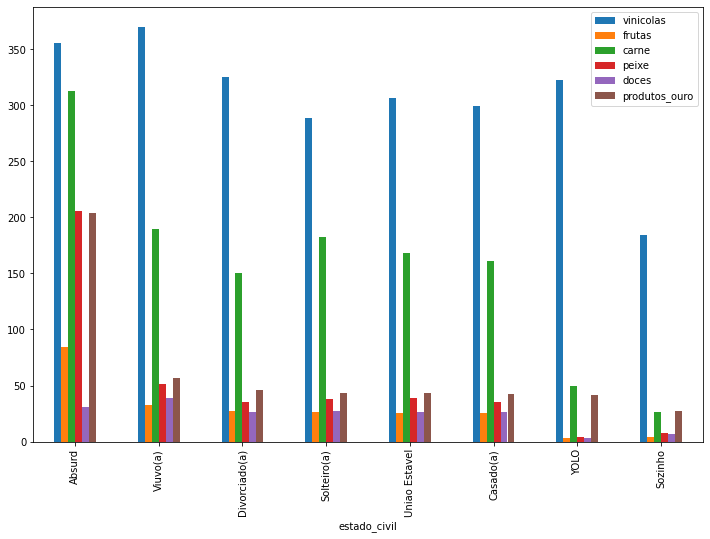

In [ ]:
# Agora podemos verificar graficamente para visualizar melhor os dados anteriores
df.groupby('estado_civil')['vinicolas','frutas','carne','peixe', 'doces','produtos_ouro', ].mean().sort_values(by='produtos_ouro', ascending=False).plot.bar(figsize=(12,8))

É possível perceber que os maiores gastos são com produtos oriundos de vinículas em todos o grupos analisados, logo em seguida se destacam os produtos carnes e seus derivados e em terceiro lugar, produtos ouro. Carnes e produtos advindos de vinículas são produtos que provavelmente dão muito lucro e cujas ações de marketing tem funcionado bem. Seria interessante fazer um trabalho voltado para os demais produtos, principalmente para PRODUTOS OURO(supondo que esses produtos atraiam também mais Assinaturas Gold e cadastros, em geral)

In [ ]:
#Verificando a média de renda anual dos clientes de acordo com a escolaridade
df.groupby('escolaridade')['renda_anual'].mean().sort_values(ascending=False)

escolaridade
PhD                56145.313929
Mestrado           52917.534247
Graduacao          52720.373656
Pós-graduação      47633.190000
Formacao_Basica    20306.259259
Name: renda_anual, dtype: float64

<AxesSubplot:xlabel='escolaridade'>

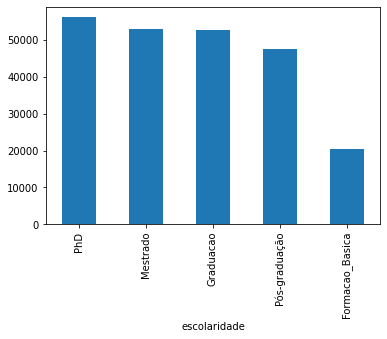

In [ ]:
# Analisando a média da renda familiar por Nivel Escolar graficamente
df.groupby('escolaridade')['renda_anual'].mean().sort_values(ascending=False).plot.bar()

Aqui é possível observar uma tendência de que quanto maior a o grau de instrução do cliente, maior é a renda familiar dos clientes

In [ ]:
'''
OBS: Sabemos que para gráfico de pizza o limite máximo de dados analisados seriam 3,
porém ainda não temos recursos de código suficiente para exibir os dados com PORCENTAGEM nos gráficos de barras.
'''

'\nOBS: Sabemos que para gráfico de pizza o limite máximo de dados analisados seriam 3,\nporém ainda não temos recursos de código suficiente para exibir os dados com PORCENTAGEM nos gráficos de barras.\n'

<AxesSubplot:ylabel='None'>

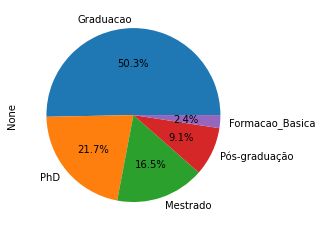

In [ ]:
#fazendo um grafico de pizza para analisar a razão do nível educacional em relação ao total
df.groupby('escolaridade',dropna=False).size().sort_values(ascending=False).plot.pie(autopct='%.1f%%')

Esse gráfico de pizza mostra o percentil da graduação dos clientes. Um pouco mais da metade deles tem Ensino superior completo e apenas 2,4% possiu apenas escolaridade básica.Essa análise é importante para verificar o perfil do cliente

In [ ]:
df.groupby('estado_civil')['reclamacoes'].sum().sort_values(ascending=False)

estado_civil
Casado(a)        8
Solteiro(a)      6
Uniao Estavel    5
Divorciado(a)    2
Absurd           0
Sozinho          0
Viuvo(a)         0
YOLO             0
Name: reclamacoes, dtype: int64

<AxesSubplot:xlabel='Reclamações', ylabel='ID'>

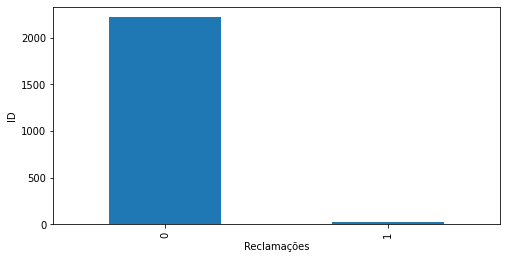

In [ ]:
# Gráfico das Reclamações
df.groupby(['reclamacoes'],dropna=False).size().sort_values(ascending=False).plot.bar(figsize=(8,4),xlabel='Reclamações',ylabel='ID')

In [ ]:
p_reclamacoes = (21/2240)*100
print(p_reclamacoes)

0.9375


No total, foram muito poucas as reclamações dos clientes listados nos ultimos 2 anos considerando que são 2240 clientes e apenas um total de 21 reclamações, que é um número expremamente baixo, menos de 1% dos clientes fizeram uma reclamação. Ou a loja tem um atendimento excelente ou os dados das reclamações não foram todos coletados.

In [ ]:
#Verificando o percentual em relação ao estado civil
df.groupby('estado_civil')['reclamacoes'].sum().sort_values(ascending=False)

estado_civil
Casado(a)        8
Solteiro(a)      6
Uniao Estavel    5
Divorciado(a)    2
Absurd           0
Sozinho          0
Viuvo(a)         0
YOLO             0
Name: reclamacoes, dtype: int64

Podemos observar que a maior parte dos clientes está em um relacionamento. Talvez seja necessário fazer mais campanhas voltadas para pessoas que não estão em nenhum relacionamento ou em outras categorias.

In [ ]:
#observando as quantidades de clientes por estado civil
df[['estado_civil']].value_counts()

estado_civil 
Casado(a)        864
Uniao Estavel    580
Solteiro(a)      480
Divorciado(a)    232
Viuvo(a)          77
Sozinho            3
Absurd             2
YOLO               2
dtype: int64

In [ ]:
#verificando a porcentagem de cada tipo de relacionamento

for x in df['estado_civil'].unique():
    percentual = df['estado_civil'].value_counts(normalize=True)[x] * 100
    print(f'"{x}" equivale a  {percentual:.2f}% dos clientes.')

"Solteiro(a)" equivale a  21.43% dos clientes.
"Uniao Estavel" equivale a  25.89% dos clientes.
"Casado(a)" equivale a  38.57% dos clientes.
"Divorciado(a)" equivale a  10.36% dos clientes.
"Viuvo(a)" equivale a  3.44% dos clientes.
"Sozinho" equivale a  0.13% dos clientes.
"Absurd" equivale a  0.09% dos clientes.
"YOLO" equivale a  0.09% dos clientes.


In [ ]:
#Analisando a média de compras por estado civil no site, catálogo e loja física 
df.groupby('estado_civil')['compras_site','catalogo','loja_fisica'].mean().sort_values(by='compras_site', ascending=False)

<ipython-input-58-da0f399eab19>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('estado_civil')['compras_site','catalogo','loja_fisica'].mean().sort_values(by='compras_site', ascending=False)


,compras_site,catalogo,loja_fisica
estado_civil,,,
YOLO,7.000000,1.000000,6.000000
Sozinho,5.000000,0.666667,4.000000
Viuvo(a),4.623377,3.324675,6.415584
Divorciado(a),4.310345,2.672414,5.818966
Casado(a),4.087963,2.625000,5.850694
Uniao Estavel,4.081034,2.675862,5.736207
Solteiro(a),3.872917,2.600000,5.639583
Absurd,3.500000,7.500000,6.500000


A maior parte ainda prefere fazer as compras na loja física, apenas Yolo que são apenas 2 indivíduos fizeram suas compras preferencialmente no site

In [ ]:
#comparando as quantidades de compras em difetentes meios
df[['compras_site', 'catalogo', 'loja_fisica']].sum()

compras_site     9150
catalogo         5963
loja_fisica     12970
dtype: int64

<AxesSubplot:ylabel='None'>

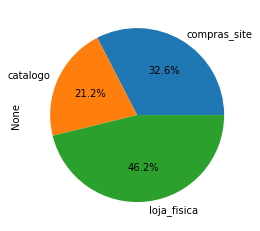

In [ ]:
#foi necessário criar uma variável para gerar o gráfico da soma das colunas
pizza = df[['compras_site', 'catalogo', 'loja_fisica']].sum()
pizza.plot.pie(autopct='%.1f%%')

O gráfico acima mostra a proporção das compras. Há um volume de compras nos três meios analisados, mas as compras em lojas físicas são as mais relevantes. Podendo ser interessante fazer algumas das campanhas dentro das lojas, mas também incentivar os clientes a comprarem mais pelo site ou pelo catálogo

###Alálises com consumidores que têm menores em casa

In [ ]:
df['n_criancas'].value_counts()

0    1293
1     899
2      48
Name: n_criancas, dtype: int64

In [ ]:
npequenos = 899 + 48
print(npequenos)
print(npequenos/2240)

947
0.42276785714285714


1293, não possuem crianças em casa, somando os que tem 1 e 2 crianças temos que 947 cosumidores possuem crianças em casa o que equivale a aproximandamente 42%

In [ ]:
df['n_adolescentes'].value_counts()

0    1158
1    1030
2      52
Name: n_adolescentes, dtype: int64

In [ ]:
nmaiores= 1030 + 52
print(nmaiores)
print(nmaiores/2240)

1082
0.4830357142857143


1158, não possuem adolescentes em casa, somando os que tem 1 e 2 adolescentes temos que 1082 cosumidores possuem adolescentes em casa o que equivale a aproximandamente 48% do grupo

In [ ]:
#criando uma cópia, para depois unir os grupos que tem crianças e adolescentes, em uma coluna filhos
#para verficar a efetividade das capanhas e o perfil dos consumidores que tem filhos, em relação aos que não tem
#e outras relações que podem ser feitas
dfilhos = df.copy()
#concatenando as colunas número de crianças e número de adolescentes em uma coluna dependentes menores de idade
dfilhos['n_menores'] = dfilhos['n_criancas'] + dfilhos['n_adolescentes']

In [ ]:
#Verificando o total de dependentes
dfilhos['n_menores'].value_counts()

1    1128
0     638
2     421
3      53
Name: n_menores, dtype: int64

In [ ]:
dfilhos

,id,ano_nascimento,escolaridade,estado_civil,renda_anual,n_criancas,n_adolescentes,data_cadastro,n_dias_ult_compra,vinicolas,...,loja_fisica,visitas_ult_mes,campanha3,campanha4,campanha5,campanha1,campanha2,reclamacoes,resposta,n_menores
0,5524,1957,Graduacao,Solteiro(a),58138.0,0,0,2012-09-04,58,635,...,4,7,0,0,0,0,0,0,1,0
1,2174,1954,Graduacao,Solteiro(a),46344.0,1,1,2014-03-08,38,11,...,2,5,0,0,0,0,0,0,0,2
2,4141,1965,Graduacao,Uniao Estavel,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,0,0
3,6182,1984,Graduacao,Uniao Estavel,26646.0,1,0,2014-02-10,26,11,...,4,6,0,0,0,0,0,0,0,1
4,5324,1981,PhD,Casado(a),58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduacao,Casado(a),61223.0,0,1,2013-06-13,46,709,...,4,5,0,0,0,0,0,0,0,1
2236,4001,1946,PhD,Uniao Estavel,64014.0,2,1,2014-06-10,56,406,...,5,7,0,0,0,1,0,0,0,3
2237,7270,1981,Graduacao,Divorciado(a),56981.0,0,0,2014-01-25,91,908,...,13,6,0,1,0,0,0,0,0,0
2238,8235,1956,Mestrado,Uniao Estavel,69245.0,0,1,2014-01-24,8,428,...,10,3,0,0,0,0,0,0,0,1


In [ ]:
sdependentes  = 638 / 2240
print(sdependentes)

0.28482142857142856


Aqui temos uma observação muito interessante que não foi possivel antes. Quando juntamos crianças e adolescentes em um grupo, podemos observar que há mais consumidores com algum menor em casa do que os que não tem nenhum. Os que não tem crianças ou adolescentes reprentam apenas 28% do total

In [ ]:
#verificando o total de dependentes menores por estado civil
dfilhos.groupby('estado_civil')['n_menores'].sum().sort_values(ascending=False)

estado_civil
Casado(a)        836
Uniao Estavel    568
Solteiro(a)      418
Divorciado(a)    233
Viuvo(a)          67
Sozinho            5
YOLO               2
Absurd             0
Name: n_menores, dtype: int64

In [ ]:
#verificando a quantidade média de dependentes menores em relação a escolaridade dos clientes
dfilhos.groupby('escolaridade')['n_menores'].mean().sort_values(ascending=False)

escolaridade
PhD                1.000000
Mestrado           0.989189
Graduacao          0.938776
Pós-graduação      0.886700
Formacao_Basica    0.722222
Name: n_menores, dtype: float64

<AxesSubplot:ylabel='None'>

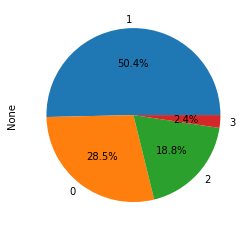

In [ ]:
dfilhos.groupby('n_menores',dropna=False).size().sort_values(ascending=False).plot.pie(autopct='%.1f%%')

###Verificando a efetividade das campanhas

In [ ]:
df[['campanha1']].value_counts()

campanha1
0            2096
1             144
dtype: int64

<ipython-input-73-94d98fbc123d>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('escolaridade')['campanha1','campanha2','campanha3','campanha4','campanha5','resposta'].sum().plot.bar(figsize=(15,5),xlabel='escolaridade',ylabel='Efetividade das campanhas')


<AxesSubplot:xlabel='escolaridade', ylabel='Efetividade das campanhas'>

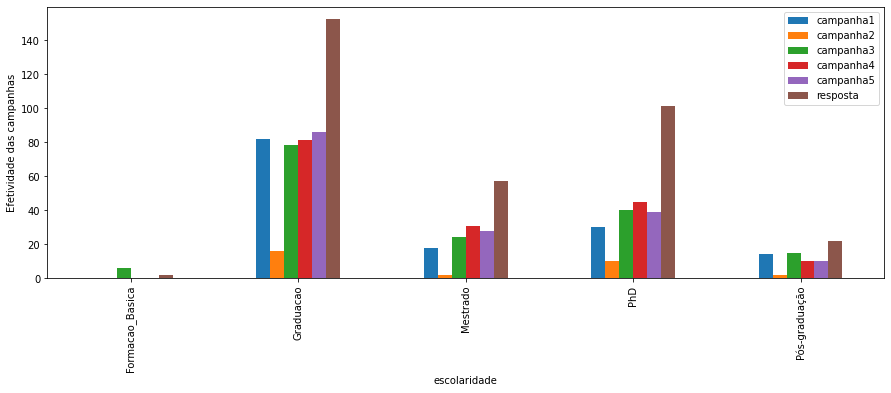

In [ ]:
#Verificando a efetividade das campanhas em relação a escolaridade
df.groupby('escolaridade')['campanha1','campanha2','campanha3','campanha4','campanha5','resposta'].sum().plot.bar(figsize=(15,5),xlabel='escolaridade',ylabel='Efetividade das campanhas')

In [ ]:
df[['campanha2']].value_counts()

campanha2
0            2210
1              30
dtype: int64

In [ ]:
df[['campanha3']].value_counts()

campanha3
0            2077
1             163
dtype: int64

In [ ]:
df[['campanha4']].value_counts()

campanha4
0            2073
1             167
dtype: int64

In [ ]:
df[['campanha5']].value_counts()

campanha5
0            2077
1             163
dtype: int64

In [ ]:
df[['resposta']].value_counts()

resposta
0           1906
1            334
dtype: int64

Aqui é possível observar que as campanhas 3, 4 e 5 tiveram desempenho mediano, com um resultado muito parecido. A campanha 4 foi ainda mais bem sucedida e deve ser usada como refência entre as as anteriores, porém a campanha 2 teve resultado contraproducente, portanto tb deverá ser avaliada afim de evitar os possiveis erros que a tornaram menos efetiva. 
Já a Ultima campanha(no campo resposta) foi a que teve o melhor desempenho de todas, a principal refência para observar o que foi feito de diferente que praticamente dobrou os rescultados

<ipython-input-79-cd5171743a03>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('estado_civil')['campanha1','campanha2','campanha3','campanha4','campanha5','resposta'].sum().plot.bar(figsize=(15,8),xlabel='ESTADO CIVIL',ylabel='Efetividade das campanhas')


<AxesSubplot:xlabel='ESTADO CIVIL', ylabel='Efetividade das campanhas'>

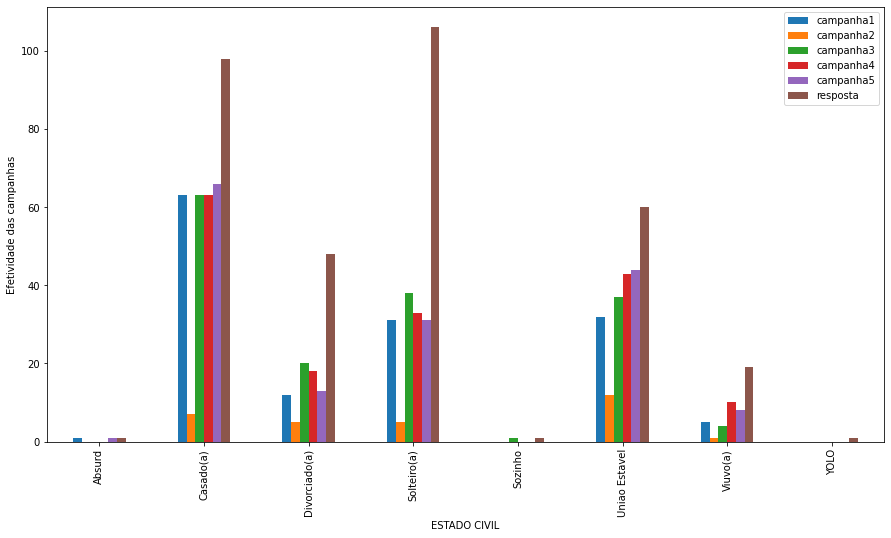

In [ ]:
#Verificando a efetividade das campanhas por estado civil
df.groupby('estado_civil')['campanha1','campanha2','campanha3','campanha4','campanha5','resposta'].sum().plot.bar(figsize=(15,8),xlabel='ESTADO CIVIL',ylabel='Efetividade das campanhas')

Aqui se observa o quanto a resposta da ultima campanha foi maior todas as anteriores. Destaca-se o aumento significativo da quantidade de assinaturas de pessoas solteiras, mas ela fou bem em todos os grupos listados

<ipython-input-80-94d98fbc123d>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('escolaridade')['campanha1','campanha2','campanha3','campanha4','campanha5','resposta'].sum().plot.bar(figsize=(15,5),xlabel='escolaridade',ylabel='Efetividade das campanhas')


<AxesSubplot:xlabel='escolaridade', ylabel='Efetividade das campanhas'>

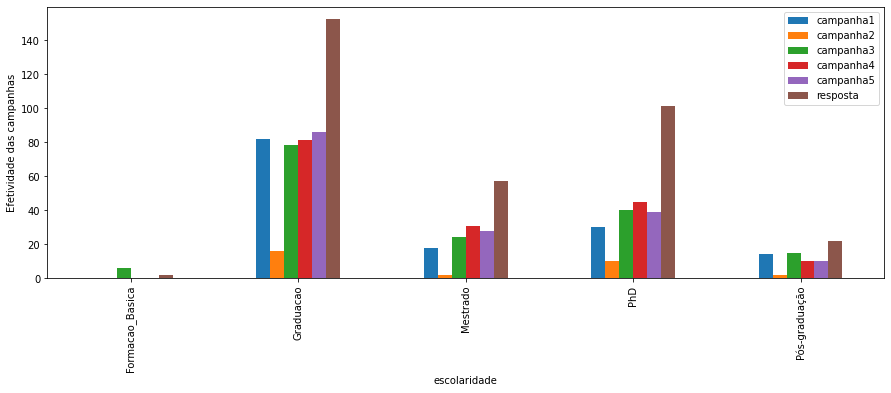

In [ ]:
#Verificando a efetividade das campanhas em relação a escolaridade
df.groupby('escolaridade')['campanha1','campanha2','campanha3','campanha4','campanha5','resposta'].sum().plot.bar(figsize=(15,5),xlabel='escolaridade',ylabel='Efetividade das campanhas')

Mais uma vez se destaca o quanto a ultima campanha teve uma ótima resposta em relação às demais

#Load - Envio dos dados tratados para o GCP e MongoDB

In [ ]:
#base e colecao
db = client['mkt']
collection = db['tratados']


In [ ]:
collection.count_documents({})

0

In [ ]:
#transformando df tratado para dicionádio
df_dict_mkt = df.to_dict("records")
collection.insert_many(df_dict_mkt)

In [ ]:
#Conferindo se foi enviado
collection.count_documents({})

2240

In [ ]:
#enviando tratados para o GCP
df.to_csv('gs://adriano-lengruber-01/tratados/mkt_tratado.csv',index=False)

In [ ]:
df.shape

(2240, 27)

# Conclusões e Sugestões

Este é o dataframe de uma campanha de marketing voltada para 2240 clientes 

1 - O número de dias da ultima compra é muito interessante para observamos alvos potenciais para as próximas campanhas afim de trazer esses clientes de volta. os clientes passaram, em média, 59 dias sem fazer compras na loja. 

Sugestão: para aumentar a média as campanhas devem ser voltadas para clientes que passaram mais tempo sem fazer compras, por exemplo, aos que não compram a mais de 40 dias, ou os que vão menos de 3 vezes em 2 meses.

2 - É possível perceber que os maiores gastos são com produtos oriundos de vinículas em todos o grupos analisados, logo em seguida se destacam os produtos carnes e seus derivados e em terceiro lugar, produtos ouro. Carnes e produtos advindos de vinículas são produtos que provavelmente dão muito lucro e cujas ações de marketing tem funcionado bem. 

Sugestão: seria interessante fazer um trabalho voltado para os demais produtos, principalmente para PRODUTOS OURO(supondo que esses produtos atraiam também mais Assinaturas Gold e cadastros, em geral)

3 - No total, foram muito poucas as reclamações dos clientes listados nos ultimos 2 anos considerando que são 2240 clientes e apenas um total de 21 reclamações, que é um número expremamente baixo, menos de 1% dos clientes fizeram uma reclamação. Ou a loja tem um atendimento excelente ou os dados das reclamações não foram todos coletados.

Sugestão: informar o canais de reclamação nas notas dos produtos

4 - Perfil dos clientes: 
Um pouco mais da metade dos clientes tem ensino superior completo, a minoria tem apenas ensino básico

Pelo menos 64,46% está em um relacionamento com outra pessoa sendo então ainda necessário continuar focando as campanhas para atingir os outros perfis

Quanto a existência de menores em duas casas, 71,5% deles tem crianças ou adolescentes em casas e apenas 28,5% não tem nenhum dos grupos. Uma boa estratégia é tentar aumentar a quantidade de assinaturas para pessoas que não tem crianças ou adolescentes

5 - Em relação às campanhas observamos que as campanhas 3, 4 e 5 tiveram desempenho mediano, com um resultado muito parecido. A campanha 4 foi ainda mais bem sucedida e deve ser usada como refência entre as as anteriores, porém a campanha 2 teve resultado contraproducente, portanto tb deverá ser avaliada afim de evitar os possiveis erros que a tornaram menos efetiva. Já a Ultima campanha(no campo resposta) foi a que teve o melhor desempenho das 3 sendo essa, a principal refência para obeservao que foi feito de diferença que praticamente dobrou os resultados, destaca-se o aumento significativo da quantidade de assinaturas de pessoas solteiras, mas ela fou bem em todos os grupos listados. 

A ultima campanha deve continuar sendo aplicada e focada para as pessoas solteiras, que ainda fazem parte de uma minoria dos clientes e tb devem ser feitas mais campanhas voltadas para pessoas sem filhos e/ou dependentes menores de idade, já que esse grupo apresenta apenas 28,5% to todal de consumidores, caso esse seja um dos objetivos da equipe de marketing da loja